In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import os
import shutil   
import itertools 
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

import keras
from keras import models
from keras import backend as K
from keras.applications import imagenet_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.metrics import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential, Model
from keras.layers import Activation, MaxPool2D, Dropout, BatchNormalization
from keras.layers.core import Dense, Flatten
from keras.layers.convolutional import *
from sklearn.metrics import confusion_matrix

In [4]:
os.environ['PYTHONHASHSEED'] = '0'
np.random.seed = 123
random.seed(456)
tf.random.set_seed(789)

session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

In [5]:
base_path = 'MyDrive/SGP7'
train_path = os.path.join(base_path + '/2750train')
valid_path = os.path.join(base_path + '/2750valid')
test_path = os.path.join(base_path + '/2750test')

In [6]:
categories = []
for (dirpath, dirnames, filenames) in os.walk(os.path.join(base_path + '/2750')):
    categories.extend(dirnames)
print(categories)

['Highway', 'AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']


In [7]:
for category in categories:
    tr = os.path.join(train_path, category)
    len_tr = len(os.listdir(tr))
    
    val = os.path.join(valid_path, category)
    len_val = len(os.listdir(val))
    
    test = os.path.join(test_path, category)
    len_test = len(os.listdir(val))
    
    print('Train images for ' + category + ': {}'.format(len_tr))
    print('Validation images for ' + category + ': {}'.format(len_val))
    print('Test images for ' + category + ': {}'.format(len_test))
    print('')

Train images for Highway: 2000
Validation images for Highway: 250
Test images for Highway: 250

Train images for AnnualCrop: 2400
Validation images for AnnualCrop: 300
Test images for AnnualCrop: 300

Train images for Forest: 2400
Validation images for Forest: 300
Test images for Forest: 300

Train images for HerbaceousVegetation: 2400
Validation images for HerbaceousVegetation: 300
Test images for HerbaceousVegetation: 300

Train images for Industrial: 2000
Validation images for Industrial: 250
Test images for Industrial: 250

Train images for Pasture: 1600
Validation images for Pasture: 200
Test images for Pasture: 200

Train images for PermanentCrop: 2000
Validation images for PermanentCrop: 250
Test images for PermanentCrop: 250

Train images for Residential: 2400
Validation images for Residential: 300
Test images for Residential: 300

Train images for River: 2000
Validation images for River: 250
Test images for River: 250

Train images for SeaLake: 2400
Validation images for SeaLa

In [8]:
train_batches = ImageDataGenerator().flow_from_directory(train_path,              
                                                         target_size=(64, 64),
                                                         classes=categories,
                                                         batch_size=20)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path,
                                                         target_size=(64, 64),
                                                         classes=categories,
                                                         batch_size=10)
test_batches = ImageDataGenerator().flow_from_directory(test_path,
                                                         target_size=(64, 64),
                                                         classes=categories,
                                                         batch_size=10,
                                                         shuffle=False)

Found 21600 images belonging to 10 classes.
Found 2700 images belonging to 10 classes.
Found 2700 images belonging to 10 classes.


In [9]:
def plots(ims, figsize=(30, 15), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if(ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims) //rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.tight_layout()
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [10]:
imgs, labels = next(train_batches)  # grabbing a single batch of images with their corresponding labels

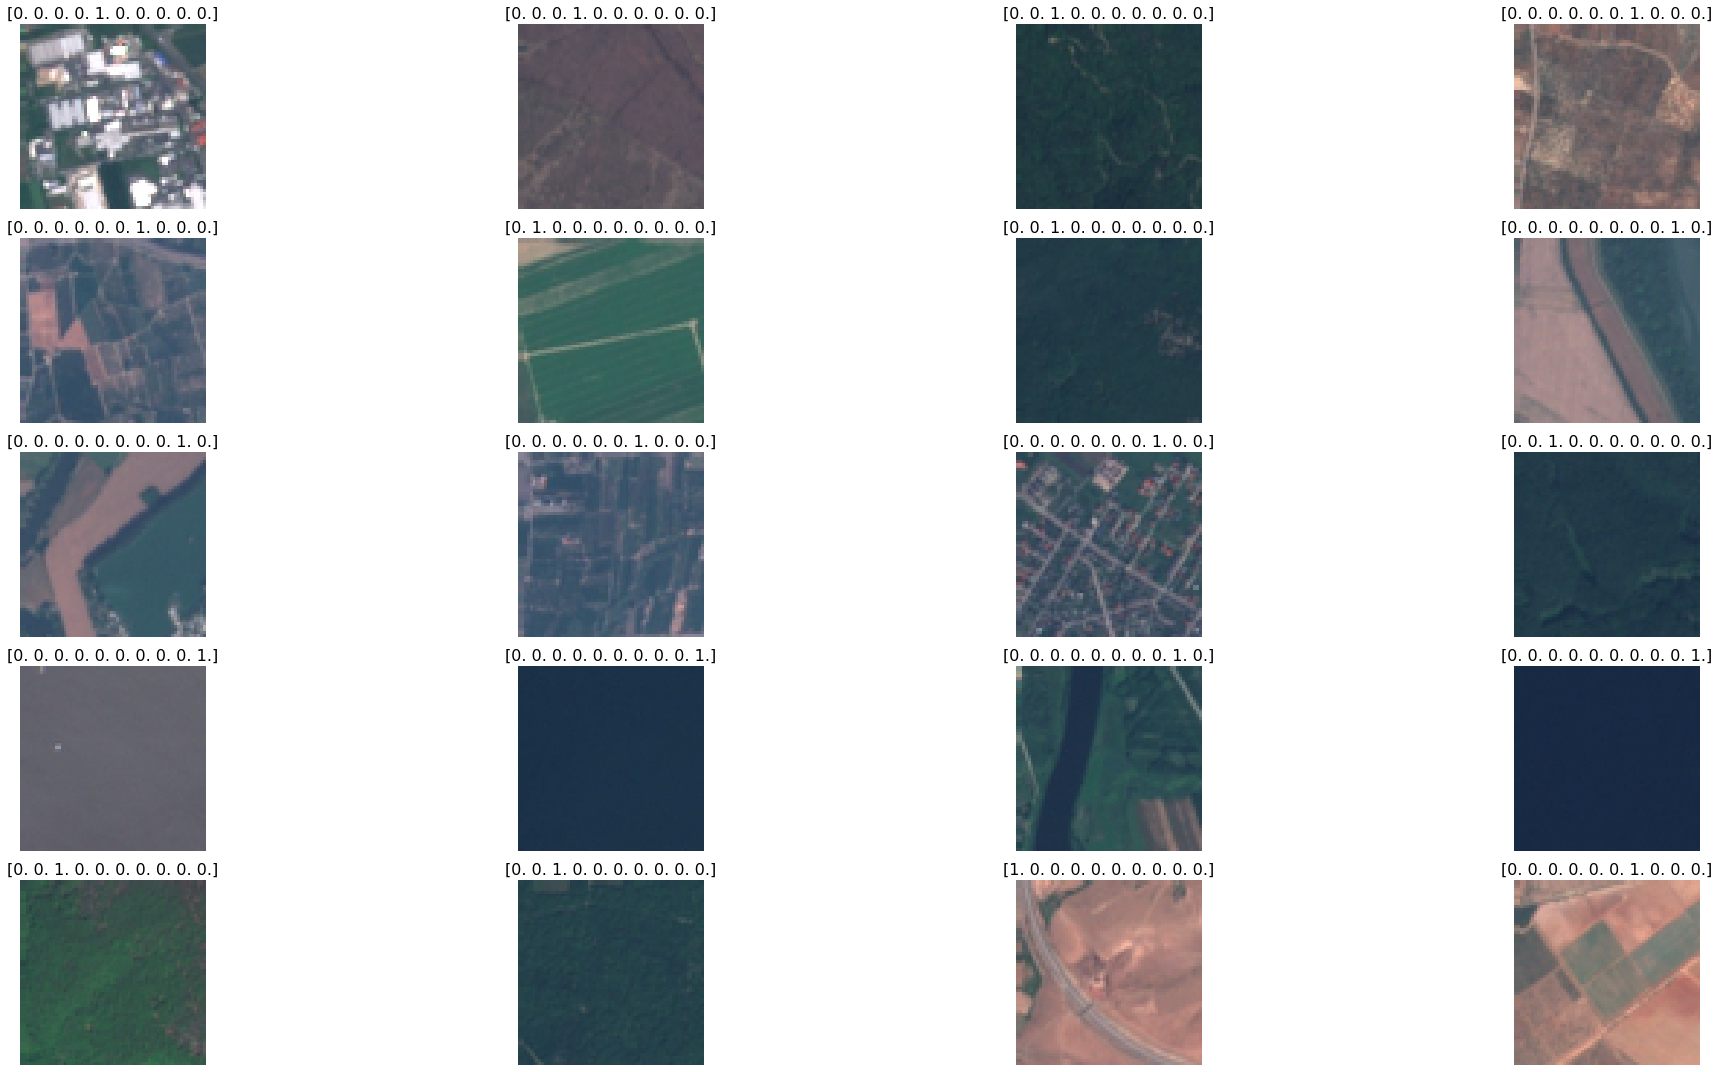

In [ ]:
plots(imgs, rows=5, titles=labels)

In [11]:
model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(64,64,3)), 
        BatchNormalization(axis= 1),
        MaxPool2D(2, 2),
        
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(axis= 1),
        MaxPool2D(2, 2),
        

        Conv2D(72, (3, 3), activation='relu'),
        Flatten(), 
        Dense(16, activation='relu'),

        Dense(10, activation='softmax') 
])

In [12]:
model.compile(Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
%%time

history = model.fit_generator(train_batches, steps_per_epoch=552, 
                   validation_data=valid_batches, validation_steps=270,
                   epochs=30,
                   verbose=2)

Epoch 1/30
552/552 - 3052s - loss: 1.5844 - accuracy: 0.4365 - val_loss: 1.3174 - val_accuracy: 0.5400
Epoch 2/30
552/552 - 1192s - loss: 1.1650 - accuracy: 0.6014 - val_loss: 1.0097 - val_accuracy: 0.6448
Epoch 3/30
552/552 - 596s - loss: 0.9487 - accuracy: 0.6759 - val_loss: 0.9894 - val_accuracy: 0.6481
Epoch 4/30
552/552 - 317s - loss: 0.7749 - accuracy: 0.7318 - val_loss: 0.7073 - val_accuracy: 0.7541
Epoch 5/30
552/552 - 209s - loss: 0.7026 - accuracy: 0.7534 - val_loss: 0.6549 - val_accuracy: 0.7826
Epoch 6/30
552/552 - 167s - loss: 0.6212 - accuracy: 0.7884 - val_loss: 0.6202 - val_accuracy: 0.8030
Epoch 7/30
552/552 - 156s - loss: 0.6009 - accuracy: 0.7898 - val_loss: 0.6546 - val_accuracy: 0.7737
Epoch 8/30
552/552 - 153s - loss: 0.5431 - accuracy: 0.8117 - val_loss: 0.6039 - val_accuracy: 0.7833
Epoch 9/30
552/552 - 150s - loss: 0.5178 - accuracy: 0.8208 - val_loss: 0.5669 - val_accuracy: 0.8115
Epoch 10/30
552/552 - 149s - loss: 0.4924 - accuracy: 0.8322 - val_loss: 0.5379 

In [ ]:
import os.path
if os.path.isfile(os.path.join(base_path + '/model/model1.h5')) is False:
  model.save(os.path.join(base_path + '/model/model1.h5')) 

In [ ]:
from tensorflow.keras.models import load_model
model = load_model(os.path.join(base_path + '/model/model1.h5'))

In [ ]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

NameError: ignored

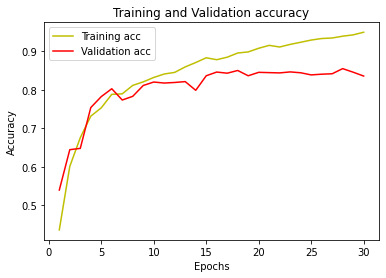

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
predictions = model.predict_generator(test_batches, steps=270, verbose=0)

In [14]:
vgg16_model = keras.applications.vgg16.VGG16(include_top=False, input_shape=(64,64,3))

58900480/58889256 [==============================] - 1s 0us/step


In [15]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0     

In [16]:
model = Sequential()
for layer in vgg16_model.layers:
    model.add(layer)

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 16, 16, 256)      

In [18]:
NUM_TRAINABLE_LAYERS = 10
for layer in model.layers[:-NUM_TRAINABLE_LAYERS]:
    layer.trainable = False 

In [19]:
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 16, 16, 256)      

In [21]:
model.compile(Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
%%time
history = model.fit_generator(train_batches, steps_per_epoch=552,
                   validation_data=valid_batches, validation_steps=270,
                   epochs=15,
                   verbose=2)

Epoch 1/15
552/552 - 3339s - loss: 0.6995 - accuracy: 0.7902 - val_loss: 0.2587 - val_accuracy: 0.9244
Epoch 2/15
552/552 - 1297s - loss: 0.2870 - accuracy: 0.9153 - val_loss: 0.2357 - val_accuracy: 0.9311
Epoch 3/15
552/552 - 642s - loss: 0.2142 - accuracy: 0.9351 - val_loss: 0.2613 - val_accuracy: 0.9137
Epoch 4/15
552/552 - 351s - loss: 0.1804 - accuracy: 0.9457 - val_loss: 0.2313 - val_accuracy: 0.9348
Epoch 5/15
552/552 - 188s - loss: 0.1599 - accuracy: 0.9524 - val_loss: 0.2383 - val_accuracy: 0.9281
Epoch 6/15
552/552 - 108s - loss: 0.1423 - accuracy: 0.9581 - val_loss: 0.2234 - val_accuracy: 0.9319
Epoch 7/15
552/552 - 70s - loss: 0.1466 - accuracy: 0.9560 - val_loss: 0.1525 - val_accuracy: 0.9574
Epoch 8/15
552/552 - 53s - loss: 0.1201 - accuracy: 0.9668 - val_loss: 0.1734 - val_accuracy: 0.9456
Epoch 9/15
552/552 - 48s - loss: 0.1131 - accuracy: 0.9644 - val_loss: 0.1854 - val_accuracy: 0.9463
Epoch 10/15
552/552 - 43s - loss: 0.1058 - accuracy: 0.9678 - val_loss: 0.2790 - va

In [23]:
import os.path
if os.path.isfile(os.path.join(base_path + '/model/model2.h5')) is False:
  model.save(os.path.join(base_path + '/model/model2.h5')) 

In [22]:
from tensorflow.keras.models import load_model
model = load_model(os.path.join(base_path + '/model/model2.h5'))

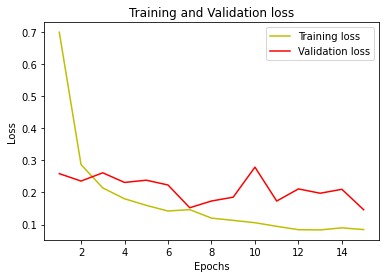

In [25]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

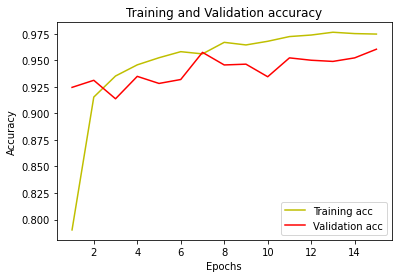

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [23]:
test_labels = categories

In [24]:
print(test_labels)

['Highway', 'AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']


In [25]:
test_batches.class_indices

{'AnnualCrop': 1,
 'Forest': 2,
 'HerbaceousVegetation': 3,
 'Highway': 0,
 'Industrial': 4,
 'Pasture': 5,
 'PermanentCrop': 6,
 'Residential': 7,
 'River': 8,
 'SeaLake': 9}

In [26]:
#predict = model.predict_classes(test_batches)
predict_x=model.predict(test_batches) 
classes_x=np.argmax(predict_x,axis=1)

In [28]:
img_path = test_path + '/Industrial/Industrial_498.jpeg'

img = image.load_img(img_path, target_size=(64,64,3))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis= 0)
img_tensor /= 255

In [32]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
predict_result = model.predict(images, batch_size=10)
classes_result = np.argmax(predict_result,axis=1)
print("Predicted class is: ",classes_result, test_labels[classes_result[0]])

Predicted class is:  [4] Industrial
